<a href="https://colab.research.google.com/github/max1nehour/Carotid-Artery-Image-Classification-Model/blob/main/stat_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

In [ ]:
pip install seaborn

In [ ]:
pip uninstall umap

In [ ]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip show umap-learn

Name: umap-learn
Version: 0.5.6
Summary: Uniform Manifold Approximation and Projection
Home-page: http://github.com/lmcinnes/umap
Author: 
Author-email: 
License: BSD
Location: /opt/conda/lib/python3.8/site-packages
Requires: numba, numpy, pynndescent, scikit-learn, scipy, tqdm
Required-by: #N/A
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --ignore-installed llvmlite --user

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 21.2 MB/s eta 0:00:0000:0100:01
    torch (<1.14.0,>=1.12.0+cu113)
                   ~~~~~~~~^
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.2 requires llvmlite<0.40,>=0.39.0dev0, but you have llvmlite 0.41.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install jupyterlab-plotly

In [ ]:
pip install plotly

In [ ]:
pip install imbalanced-learn matplotlib

In [ ]:
pip install statsmodels

In [ ]:
pip install pandas scipy

In [ ]:
df1 = pd.read_csv('follow_newcb.csv')
df2 = pd.read_csv('baseline_newcb.csv')
df =  pd.concat([df1, df2])


df['Plaque'] = df['頸超總結'].apply(lambda x: find_plaque(x))

#定義個欄位的資料型別
df['HYPERTENSION_SELF'] = df['HYPERTENSION_SELF'].astype('category')
df['DIABETES_SELF'] = df['DIABETES_SELF'].astype('category')
df['APOPLEXIA_SELF'] = df['APOPLEXIA_SELF'].astype('category')
df['HYPERLIPIDEMIA_SELF'] = df['HYPERLIPIDEMIA_SELF'].astype('category')
df['SMK_EXPERIENCE'] = df['SMK_EXPERIENCE'].astype('category')
df['SEX'] = df['SEX'].astype('category')
df['DRK'] = df['DRK'].astype('category')
df['GASTROESOPHAGEA_REFLUX_SELF'] = df['GASTROESOPHAGEA_REFLUX_SELF'].astype('category')
df['頸超總結'] = df['頸超總結'].astype(str)
# Apply the function to the Type column
df['Plaque'] = df['頸超總結'].apply(lambda x: find_plaque(x))
#change name
df = df.rename(columns ={'右CCA最高流速':'RCCA_MAX_FLOW','右CCA平均流速':'RCCA_AVG_FLOW','右CCA最低流速':'RCCA_MIN_FLOW','右CCA時間平均最大流速':'RCCA_MAX_AVG_FLOW','右CCA脈動指數':'RCCA_PULSE', '右CCA血管阻力指.':'RCCA_RESISTANCE','右CCA直徑':'RCCA_DIAMETER',
                         '左CCA最高流速':'LCCA_MAX_FLOW','左CCA平均流速':'LCCA_AVG_FLOW','左CCA最低流速':'LCCA_MIN_FLOW','左CCA時間平均最大流速':'LCCA_MAX_AVG_FLOW','左CCA脈動指數':'LCCA_PULSE', '左CCA血管阻力指數':'LCCA_RESISTANCE','左CCA直徑':'LCCA_DIAMETER',
'右ICA最高流速':'RICA_MAX_FLOW','右ICA平均流速':'RICA_AVG_FLOW','右ICA最低流速':'RICA_MIN_FLOW','右ICA時間平均最大流速':'RICA_MAX_AVG_FLOW','右ICA脈動指數':'RICA_PULSE', '右ICA血管阻力指數':'RICA_RESISTANCE','右ICA直徑':'RICA_DIAMETER',
 '左ICA最高流速':'LICA_MAX_FLOW','左ICA平均流速':'LICA_AVG_FLOW','左ICA最低流速':'LICA_MIN_FLOW','左ICA時間平均最大流速':'LICA_MAX_AVG_FLOW','左ICA脈動指數':'LICA_PULSE', '左ICA血管阻力指數':'LICA_RESISTANCE','左ICA直徑':'LICA_DIAMETER',
                        '右CCA.IMT':'RCCA_IMT','左CCA.IMT':'LCCA_IMT',
                        '右CCA正常與否':'RCCA_STATUS'})

df['RCCA_STATUS'] = df['RCCA_STATUS'].astype('category')
df['RCCA_STATUS'] = df['RCCA_STATUS'].replace('正常', 0)
df['RCCA_STATUS'] = df['RCCA_STATUS'].replace('異常', 1)
df['RCCA_STATUS'] = df['RCCA_STATUS'].replace('1.5', 1)


print(df.dtypes)
#Normalize IMT

df['RCCA_NIMT'], _ = boxcox(df['RCCA_IMT'] + 1)
df['LCCA_NIMT'], _ = boxcox(df['LCCA_IMT'] + 1)

print("檢查缺失值：")
#print(df_.isna().sum())
print(df.head())

In [ ]:
#################### 有無高血壓者 右 IMT平均值是否有差異 ############
from scipy.stats import ttest_ind

hp = df[df['HYPERTENSION_SELF']==1.0]['RCCA_NIMT']
nhp = df[df['HYPERTENSION_SELF']==0.0]['RCCA_NIMT']
print(hp)
# Print summary statistics
print("Hypertension Group Summary Statistics:")
print(hp.describe())

print("\nNon-Hypertension Group Summary Statistics:")
print(nhp.describe())

t_stat, p_value = ttest_ind(hp, nhp)
print("t-stat", t_stat)
print(f"P-value: {p_value:.6f}")
# 計算效應大小（Cohen's d）
mean_diff = np.mean(hp) - np.mean(nhp)
pooled_std = np.sqrt(((np.std(hp, ddof=1) ** 2) + (np.std(nhp, ddof=1) ** 2)) / 2)
cohen_d = mean_diff / pooled_std

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"Cohen's d: {cohen_d}")

In [ ]:
plt.ylim(0.1,0.5)
sns.set(style='whitegrid')
hype = sns.violinplot(x="HYPERTENSION_SELF",
                y="RCCA_NIMT",
                hue = 'HYPERTENSION_SELF',
                data=df)

hype.set(xlabel='Hypertension Status', ylabel='Right CCA IMT')
plt.show()
#sns.boxplot(x=df["HYPERTENSION_SELF"], y= df["右CCA.IMT"], color ='skyblue')

In [ ]:
#################### 有無高血壓者 l IMT平均值是否有差異 ############
from scipy.stats import ttest_ind

hp = df[df['HYPERTENSION_SELF']==1.0]['LCCA_NIMT']
nhp = df[df['HYPERTENSION_SELF']==0.0]['LCCA_NIMT']
print(hp)
# Print summary statistics
print("Hypertension Group Summary Statistics:")
print(hp.describe())

print("\nNon-Hypertension Group Summary Statistics:")
print(nhp.describe())

t_stat, p_value = ttest_ind(hp, nhp)
print("t-stat", t_stat)
print(f"P-value: {p_value:.6f}")
# 計算效應大小（Cohen's d）
mean_diff = np.mean(hp) - np.mean(nhp)
pooled_std = np.sqrt(((np.std(hp, ddof=1) ** 2) + (np.std(nhp, ddof=1) ** 2)) / 2)
cohen_d = mean_diff / pooled_std

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"Cohen's d: {cohen_d}")
plt.ylim(0.1,20)
sns.set(style='whitegrid')
hype = sns.violinplot(x="HYPERTENSION_SELF",
                y="LCCA_NIMT",
                hue = 'HYPERTENSION_SELF',
                data=df)

hype.set(xlabel='Hypertension Status', ylabel='Left CCA IMT')
plt.show()

In [ ]:
#################### 有無高血壓與糖尿病者 右IMT平均值是否有差異 ############
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway

df_anova = df[['HYPERTENSION_SELF', 'DIABETES_SELF','RCCA_NIMT']]
df_anova = df[['HYPERTENSION_SELF', 'DIABETES_SELF','RCCA_NIMT']].dropna()

g1 = df[(df['HYPERTENSION_SELF']==1.0) & (df['DIABETES_SELF']==1.0)]['RCCA_NIMT']
g2 = df[(df['HYPERTENSION_SELF']==1.0) & (df['DIABETES_SELF']==0.0)]['RCCA_NIMT']
g3 = df[(df['HYPERTENSION_SELF']==0.0) & (df['DIABETES_SELF']==0.0)]['RCCA_NIMT']
g4 = df[(df['HYPERTENSION_SELF']==0.0) & (df['DIABETES_SELF']==1.0)]['RCCA_NIMT']

# Print summary statistics
print(g1.describe())
print(g2.describe())
print(g3.describe())
print(g4.describe())


plt.ylim(0.1, 0.5)


plaque = sns.violinplot(x="HYPERTENSION_SELF",
                y="RCCA_NIMT",
               hue="HYPERTENSION_SELF",
                data=df)
plaque.set(xlabel='HYPERTENSION_SELF Status', ylabel='RCCA IMT')
plt.show()



In [ ]:
####################  吸菸程度 右 IMT平均值是否有差異 ############

######
smk = df[df['SMK_EXPERIENCE']==1.0]['RCCA_NIMT']
nsmk = df[df['SMK_EXPERIENCE']==2.0]['RCCA_NIMT']
# Print summary statistics
print("Smoke Group Summary Statistics:")
print(smk.describe())

print("\nNon-Smoke Group Summary Statistics:")
print(nsmk.describe())

t_stat, p_value = ttest_ind(smk, nsmk)
print("t-stat", t_stat)
print(f"P-value: {p_value:.6f}")

plt.ylim(0.1,0.5)
sns.set(style='whitegrid')
fmri = sns.load_dataset("fmri")

smoke = sns.violinplot(x="SMK_EXPERIENCE",
            y="RCCA_NIMT",
            hue = 'SMK_EXPERIENCE',
            data=df)

smoke.set(xlabel='Smoke Status', ylabel='RCCA IMT')

In [ ]:
####################  中風 右 IMT平均值是否有差異 ############
import scipy.stats as stats
######
ap = df[df['APOPLEXIA_SELF']==0.0]['RCCA_NIMT']
nap = df[df['APOPLEXIA_SELF']==1.0]['RCCA_NIMT']

# Print summary statistics
print("Apoplexia Group Summary Statistics:")
print(ap.describe())

print("\nNon-Apoplexia Group Summary Statistics:")
print(nap.describe())

t_stat, p_value = stats.ttest_ind(ap, nap)
print("t-stat", t_stat)
print(f"P-value: {p_value:.6f}")

plt.ylim(0.1, 0.5)
sns.set(style='whitegrid')
fmri = sns.load_dataset("fmri")

# sns.boxplot(x="APOPLEXIA_SELF",
#                 y="右CCA.IMT",
#                 data=df)

# 繪圖顯示
apop = sns.violinplot(x="APOPLEXIA_SELF",
                y="RCCA_NIMT",
               hue ="APOPLEXIA_SELF",
                data=df)
apop.set(xlabel='Apoplexia Status', ylabel='RCCA IMT')
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu


rcca = df[df['RCCA_STATUS']==0]['RCCA_NIMT']
abrcca = df[df['RCCA_STATUS']==1]['RCCA_NIMT']


# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=["RCCA"]*len(rcca) + ["Ab RCCA"]*len(abrcca), y=np.concatenate([rcca, abrcca]))
plt.xlabel('Group')
plt.ylabel('RCCA_NIMT')
plt.title('Violin Plot of RCCA_NIMT by Group')
plt.show()

##################PLOT###################
plt.ylim(0.1, 0.5)
# Print summary statistics
print("RCCA Group Summary Statistics:")
print(rcca.describe())

print("\nAb RCCA Group Summary Statistics:")
print(abrcca.describe())

t_stat, p_value = stats.ttest_ind(rcca, abrcca)
print("t-stat", t_stat)
print(f"P-value: {p_value:.6f}")

rcca_v = sns.violinplot(x='RCCA_STATUS',
                y="RCCA_NIMT",
               hue='RCCA_STATUS',
                data=df)
rcca_v.set(xlabel='RCCA Status', ylabel='RCCA IMT')
plt.show()


In [ ]:
############ IMT 核密度估計圖 ##########
imt = sns.kdeplot(df['RCCA_NIMT'])
plt.xlim(0.1, 0.5)
plt.figure(figsize=(10, 6))
ticks = np.arange(0, 0.6, 0.1)  # Create ticks from 0 to 1.5 with step size 0.1
imt.set_xticks(ticks)
imt.set_xticklabels([f'{tick:.1f}' for tick in ticks])
imt.set(xlabel='RCCA IMT')
plt.show()

In [ ]:
########## 生出新欄位PLAQUE 去總結中是否提到斑塊#######
########### 因為原本RCCA PLAQUE欄位 有些被診斷出有斑塊的人 卻沒有顯示任何數值 ########

def find_plaque(text):
    if 'plaque' in text:
        return 1
    else:
        return 0

# Apply the function to the Type column
df['Plaque'] = df['頸超總結'].apply(lambda x: find_plaque(x))
print(df.head())
df.to_csv('combined_data.csv', index=False)


In [ ]:
######## 有無斑塊 與IMT相關性 ########

plq = df[df['Plaque']==0]['RCCA_NIMT']
nplq = df[df['Plaque']==1]['RCCA_NIMT']

plt.ylim(0.1, 0.5)
# Print summary statistics
print("Plaque Group Summary Statistics:")
print(plq.describe())

print("\nNon-plaque Group Summary Statistics:")
print(nplq.describe())

t_stat, p_value = stats.ttest_ind(plq, nplq)
print("t-stat", t_stat)
print(f"P-value: {p_value:.6f}")

plaque = sns.violinplot(x="Plaque",
                y="RCCA_NIMT",
               hue="Plaque",
                data=df)
plaque.set(xlabel='Plaque Status', ylabel='RCCA IMT')
plt.show()

In [ ]:
######## 有無飲酒 與IMT相關性 ########
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway

df_anova = df[['DRK', 'RCCA_NIMT']]
df_anova = df[['DRK', 'RCCA_NIMT']].dropna()
# 使用 statsmodels 進行 ANOVA 分析
model = ols('RCCA_NIMT ~ DRK', data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("ANOVA Table:")
print(anova_table)

drk1 = df[df['DRK']==1.0]['RCCA_NIMT']
drk2 = df[df['DRK']==2.0]['RCCA_NIMT']
drk3 = df[df['DRK']==3.0]['RCCA_NIMT']


f_stat, p_val = f_oneway(drk1, drk2, drk3)
print("\nANOVA results using scipy.stats:")
print('F-statistic:', f_stat)
print('p-value:', p_val)

plt.ylim(0.1, 0.5)
# Print summary statistics
print("Drink 1 Group Summary Statistics:")
print(drk1.describe())

print("\nDrink 2 Group Summary Statistics:")
print(drk2.describe())

print("\nDrink 3 Group Summary Statistics:")
print(drk3.describe())

plaque = sns.violinplot(x="DRK",
                y="RCCA_NIMT",
               hue="DRK",
                data=df)
plaque.set(xlabel='Drink Status', ylabel='RCCA IMT')
plt.show()

# 使用 Tukey's HSD 檢驗
tukey = pairwise_tukeyhsd(endog=df_anova['RCCA_NIMT'],
                          groups=df_anova['DRK'],
                          alpha=0.05)

print(tukey)

# 繪製 Tukey's HSD 結果圖
tukey.plot_simultaneous()
plt.vlines(x=0, ymin=-0.5, ymax=2.5, color="r", linestyle="--")
plt.show()

In [ ]:
######## 性別 與IMT相關性 ########

plq = df[df['SEX']==1]['RCCA_NIMT'] #MALE
nplq = df[df['SEX']==2]['RCCA_NIMT']

plt.ylim(0.1, 0.5)
# Print summary statistics
print("MALE Group Summary Statistics:")
print(plq.describe())

print("\nFEMALE Group Summary Statistics:")
print(nplq.describe())

t_stat, p_value = stats.ttest_ind(plq, nplq)
print("t-stat", t_stat)
print(f"P-value: {p_value:.6f}")

plaque = sns.violinplot(x="SEX",
                y="RCCA_NIMT",
               hue="SEX",
                data=df)
plaque.set(xlabel='Gender', ylabel='RCCA IMT')
plt.show()

In [ ]:
import pandas as pd
import numpy as np



# Split the DataFrame based on hypertension status
group_0 = df[df['HYPERTENSION_SELF']==1.0]
group_1 = df[df['HYPERTENSION_SELF']==0.0]

# Define a function to calculate mean ± SD
def calculate_mean_sd(group):
    stats = group.agg(['mean', 'std']).transpose().reset_index()
    stats.columns = ['Metric', 'Mean', 'Standard Deviation']
    # Round the mean and standard deviation to 2 decimal places
    stats['Mean'] = stats['Mean'].apply(lambda x: f"{x:.2f}")
    stats['Standard Deviation'] = stats['Standard Deviation'].apply(lambda x: f"{x:.2f}")
    return stats

# Calculate for both groups
mean_sd_group_0 = calculate_mean_sd(group_0[['RCCA_IMT', 'LCCA_IMT']])
mean_sd_group_1 = calculate_mean_sd(group_1[['RCCA_IMT', 'LCCA_IMT']])

# Rename columns for clarity
mean_sd_group_0.columns = ['Metric', 'Mean', 'Standard Deviation']
mean_sd_group_1.columns = ['Metric', 'Mean', 'Standard Deviation']

# Merge the results into a single DataFrame
results = pd.merge(mean_sd_group_0, mean_sd_group_1, on='Metric', suffixes=('HYP', 'Non-HYP'))
print("Results Table:")
print(results)

# Optionally, if you want to save this table to a CSV file
results.to_csv('results_summary.csv', index=False)

import matplotlib.pyplot as plt

# Plot the results
fig, ax = plt.subplots(figsize=(10, 3)) # Set the size of the figure
ax.axis('off')
table = ax.table(cellText=results.values,
                 colLabels=results.columns,
                 rowLabels=results['Metric'],
                 cellLoc='center',
                 loc='center')

plt.title('Mean ± SD of IMT Measurements by Hypertension Group')
plt.show()


In [ ]:
from scipy.stats import pointbiserialr

plq = df[df['Plaque']==0]
nplq = df[df['Plaque']==1]

df_ = df.copy()
# 檢查缺失值和無窮值
# df_ = df_.dropna(subset=['Plaque'])
# df_['LCCA_IMT'] = df_['LCCA_IMT'].fillna(df_['LCCA_IMT'].median(numeric_only=False))

# Define numeric variables of interest
numeric_vars = [
    'RCCA_MAX_FLOW',
    'RCCA_AVG_FLOW',
    'RCCA_MIN_FLOW',
    'RCCA_MAX_AVG_FLOW',
    'RCCA_PULSE',
    'RCCA_RESISTANCE',
    'RCCA_DIAMETER',
    'LCCA_MAX_FLOW',
    'LCCA_AVG_FLOW',
    'LCCA_MIN_FLOW',
    'LCCA_MAX_AVG_FLOW',
    'LCCA_PULSE',
    'LCCA_RESISTANCE',
    'LCCA_DIAMETER',
    'RICA_MAX_FLOW',
    'RICA_AVG_FLOW',
    'RICA_MIN_FLOW',
    'RICA_MAX_AVG_FLOW',
    'RICA_PULSE',
    'RICA_RESISTANCE',
    'RICA_DIAMETER',
    'LICA_MAX_FLOW',
    'LICA_AVG_FLOW',
    'LICA_MIN_FLOW',
    'LICA_MAX_AVG_FLOW',
    'LICA_PULSE',
    'LICA_RESISTANCE',
    'LICA_DIAMETER',
    'RCCA_IMT',
    'LCCA_IMT',
]


# Fill NaN values with column mean (or another appropriate method)
df_.fillna(df_.mean(), inplace=True)
# Verify no NaN or infinite values are present
nan_counts = df_.isna().sum()



# Calculate Point Biserial Correlation for each numeric variable
correlation_results = {}
for var in numeric_vars:
    correlation, _ = pointbiserialr(df_['Plaque'], df_[var])
    correlation_results[var] = correlation

# Create a DataFrame for correlation results
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Variable', 'Point Biserial Correlation'])

# Print the correlation DataFrame
print(correlation_df)
import numpy as np

# Convert correlation results to a DataFrame suitable for a heatmap
correlation_matrix = pd.DataFrame(correlation_results, index=['Plaque']).T

# Plot the heatmap
plt.figure(figsize=(4, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Point Biserial Correlation with Plaque')
plt.yticks(fontsize=8)
plt.show()


In [ ]:
hp = df[df['HYPERTENSION_SELF']==1.0]
nhp = df[df['HYPERTENSION_SELF']==0.0]

df_ = df.copy()
# 檢查缺失值和無窮值


df_ = df_.dropna(subset=['HYPERTENSION_SELF'])
df_.fillna(df_.mean(), inplace=True)
# Calculate Point Biserial Correlation for each numeric variable
correlation_results = {}
for var in numeric_vars:
    correlation, _ = pointbiserialr(df_['HYPERTENSION_SELF'], df_[var])
    correlation_results[var] = correlation

# Create a DataFrame for correlation results
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Variable', 'Point Biserial Correlation'])

# Print the correlation DataFrame
print(correlation_df)
import numpy as np

# Convert correlation results to a DataFrame suitable for a heatmap
correlation_matrix = pd.DataFrame(correlation_results, index=['HYPERTENSION_SELF']).T

# Plot the heatmap
plt.figure(figsize=(4, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,annot_kws={"size": 10})
plt.title('Point Biserial Correlation with HYPERTENSION_SELF')
# 设置x轴和y轴标签的字体大小
plt.yticks(fontsize=8)
plt.show()

In [ ]:
hp = df[df['CORONARY_ARTERY_DIS_SELF']==1.0]
nhp = df[df['CORONARY_ARTERY_DIS_SELF']==0.0]

df_ = df.copy()
# 檢查缺失值和無窮值


df_ = df_.dropna(subset=['CORONARY_ARTERY_DIS_SELF'])
df_.fillna(df_.mean(), inplace=True)
# Calculate Point Biserial Correlation for each numeric variable
correlation_results = {}
for var in numeric_vars:
    correlation, _ = pointbiserialr(df_['CORONARY_ARTERY_DIS_SELF'], df_[var])
    correlation_results[var] = correlation

# Create a DataFrame for correlation results
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Variable', 'Point Biserial Correlation'])

# Print the correlation DataFrame
print(correlation_df)
import numpy as np

# Convert correlation results to a DataFrame suitable for a heatmap
correlation_matrix = pd.DataFrame(correlation_results, index=['CORONARY_ARTERY_DIS_SELF']).T

# Plot the heatmap
plt.figure(figsize=(4, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,annot_kws={"size": 10})
plt.title('Point Biserial Correlation with CORONARY_ARTERY_DIS_SELF')
# 设置x轴和y轴标签的字体大小
plt.yticks(fontsize=8)
plt.show()

In [ ]:
hp = df[df['DIABETES_SELF']==1.0]
nhp = df[df['DIABETES_SELF']==0.0]

df_ = df.copy()
# 檢查缺失值和無窮值


df_ = df_.dropna(subset=['DIABETES_SELF'])
df_.fillna(df_.mean(), inplace=True)
# Calculate Point Biserial Correlation for each numeric variable
correlation_results = {}
for var in numeric_vars:
    correlation, _ = pointbiserialr(df_['DIABETES_SELF'], df_[var])
    correlation_results[var] = correlation

# Create a DataFrame for correlation results
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Variable', 'Point Biserial Correlation'])

# Print the correlation DataFrame
print(correlation_df)
import numpy as np

# Convert correlation results to a DataFrame suitable for a heatmap
correlation_matrix = pd.DataFrame(correlation_results, index=['DIABETES_SELF']).T

# Plot the heatmap
plt.figure(figsize=(4, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,annot_kws={"size": 10})
plt.title('Point Biserial Correlation with DIABETES_SELF')
# 设置x轴和y轴标签的字体大小
plt.yticks(fontsize=8)
plt.show()

In [ ]:
hp = df[df['SEX']==1.0]
nhp = df[df['SEX']==0.0]

df_ = df.copy()
# 檢查缺失值和無窮值


df_ = df_.dropna(subset=['SEX'])
df_.fillna(df_.mean(), inplace=True)
# Calculate Point Biserial Correlation for each numeric variable
correlation_results = {}
for var in numeric_vars:
    correlation, _ = pointbiserialr(df_['SEX'], df_[var])
    correlation_results[var] = correlation

# Create a DataFrame for correlation results
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Variable', 'Point Biserial Correlation'])

# Print the correlation DataFrame
print(correlation_df)
import numpy as np

# Convert correlation results to a DataFrame suitable for a heatmap
correlation_matrix = pd.DataFrame(correlation_results, index=['SEX']).T

# Plot the heatmap
plt.figure(figsize=(4, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,annot_kws={"size": 10})
plt.title('Point Biserial Correlation with SEX')
# 设置x轴和y轴标签的字体大小
plt.yticks(fontsize=8)
plt.show()

In [ ]:
hp = df[df['SMK_EXPERIENCE']==1.0]
nhp = df[df['SMK_EXPERIENCE']==0.0]

df_ = df.copy()
# 檢查缺失值和無窮值


df_ = df_.dropna(subset=['SMK_EXPERIENCE'])
df_.fillna(df_.mean(), inplace=True)
# Calculate Point Biserial Correlation for each numeric variable
correlation_results = {}
for var in numeric_vars:
    correlation, _ = pointbiserialr(df_['SMK_EXPERIENCE'], df_[var])
    correlation_results[var] = correlation

# Create a DataFrame for correlation results
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Variable', 'Point Biserial Correlation'])

# Print the correlation DataFrame
print(correlation_df)
import numpy as np

# Convert correlation results to a DataFrame suitable for a heatmap
correlation_matrix = pd.DataFrame(correlation_results, index=['SMK_EXPERIENCE']).T

# Plot the heatmap
plt.figure(figsize=(4, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,annot_kws={"size": 10})
plt.title('Point Biserial Correlation with SMK_EXPERIENCE')
# 设置x轴和y轴标签的字体大小
plt.yticks(fontsize=8)
plt.show()

In [ ]:
hp = df[df['DRK']==1.0]
nhp = df[df['DRK']==0.0]

df_ = df.copy()
# 檢查缺失值和無窮值


df_ = df_.dropna(subset=['DRK'])
df_.fillna(df_.mean(), inplace=True)
# Calculate Point Biserial Correlation for each numeric variable
correlation_results = {}
for var in numeric_vars:
    correlation, _ = pointbiserialr(df_['DRK'], df_[var])
    correlation_results[var] = correlation

# Create a DataFrame for correlation results
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Variable', 'Point Biserial Correlation'])

# Print the correlation DataFrame
print(correlation_df)
import numpy as np

# Convert correlation results to a DataFrame suitable for a heatmap
correlation_matrix = pd.DataFrame(correlation_results, index=['DRK']).T

# Plot the heatmap
plt.figure(figsize=(4, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,annot_kws={"size": 10})
plt.title('Point Biserial Correlation with DRK')
# 设置x轴和y轴标签的字体大小
plt.yticks(fontsize=8)
plt.show()

In [ ]:
hp = df[df['APOPLEXIA_SELF']==1.0]
nhp = df[df['APOPLEXIA_SELF']==0.0]

df_ = df.copy()
# 檢查缺失值和無窮值


df_ = df_.dropna(subset=['APOPLEXIA_SELF'])
df_.fillna(df_.mean(), inplace=True)
# Calculate Point Biserial Correlation for each numeric variable
correlation_results = {}
for var in numeric_vars:
    correlation, _ = pointbiserialr(df_['APOPLEXIA_SELF'], df_[var])
    correlation_results[var] = correlation

# Create a DataFrame for correlation results
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Variable', 'Point Biserial Correlation'])

# Print the correlation DataFrame
print(correlation_df)
import numpy as np

# Convert correlation results to a DataFrame suitable for a heatmap
correlation_matrix = pd.DataFrame(correlation_results, index=['APOPLEXIA_SELF']).T

# Plot the heatmap
plt.figure(figsize=(4, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,annot_kws={"size": 10})
plt.title('Point Biserial Correlation with APOPLEXIA_SELF')
# 设置x轴和y轴标签的字体大小
plt.yticks(fontsize=8)
plt.show()

In [ ]:
import pandas as pd
import scipy.stats as stats

contingency_table = pd.crosstab(df['RCCA_STATUS'], df['Plaque'])

# 計算卡方檢定
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi2 Statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of Freedom: {dof}')
print(f'Expected Frequencies Table: \n{expected}')

# 繪製熱圖
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Contingency Table Heatmap')
plt.show()

In [ ]:
import pandas as pd
import scipy.stats as stats

contingency_table = pd.crosstab(df['RCCA_STATUS'], df['HYPERTENSION_SELF'])

# 計算卡方檢定
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi2 Statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of Freedom: {dof}')
print(f'Expected Frequencies Table: \n{expected}')

# 繪製熱圖
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Contingency Table Heatmap')
plt.show()

In [ ]:
#======================================plaque distribution==================================

df_ = df[(df['右CCA斑塊']!= '無明顯異常') & (df['右CCA斑塊']!= '無')  & (df['右CCA斑塊']!= '無明顯斑塊')]
count1 = df_['右CCA斑塊'].count()
print(f"Non-NaN values in 右CCA斑塊: {count1}")

df_ = df[(df['左CCA斑塊']!= '無明顯異常') & (df['左CCA斑塊']!= '無')  & (df['左CCA斑塊']!= '無明顯斑塊')]
count2 = df_['左CCA斑塊'].count()
print(f"Non-NaN values in 左CCA斑塊: {count2}")

df_ = df[(df['右ICA斑塊']!= '無明顯異常') & (df['右ICA斑塊']!= '無')  & (df['右ICA斑塊']!= '無明顯斑塊')]
count3 = df_['右ICA斑塊'].count()
print(f"Non-NaN values in 右ICA斑塊: {count3}")

df_ = df[(df['左ICA斑塊']!= '無明顯異常') & (df['左ICA斑塊']!= '無')  & (df['左ICA斑塊']!= '無明顯斑塊')]
count4 = df_['左ICA斑塊'].count()
print(f"Non-NaN values in 左ICA斑塊: {count4}")

# Sample data
data = {
    'Artery': ['RCCA', 'LCCA', 'RICA', 'LICA'],
    'Plaque count': [3289, 147, 540, 643]
}
# List of Seaborn color palettes
palettes = {
    'deep': sns.color_palette('deep'),
    'pastel': sns.color_palette('pastel'),
    'dark': sns.color_palette('dark'),
    'colorblind': sns.color_palette('colorblind'),
    'husl': sns.color_palette('husl'),
    'Set1': sns.color_palette('Set1'),
}
# Create a DataFrame
import pandas as pd
plq_count = pd.DataFrame(data)

# Create the bar plot
sns.barplot(x='Artery', y='Plaque count', data=plq_count, hue='Plaque count',palette=palettes['deep'])

# Add titles and labels
plt.title('Plaque Counts Bar Plot')
plt.xlabel('Artery')
plt.ylabel('Plaque count')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

def find_plaque(severity):
    if int(severity)>1:
        return 1
    else:
        return 0

df1 = pd.read_csv('base_noimg.csv')
df2 = pd.read_csv('follow_noimg.csv')
df = pd.concat([df1, df2],axis=0)
df_ = df.copy()
print(df_.shape)
df_ = df_.drop(columns=['Release_No','PA_UIKey','SURVEY_DATE','SMK_2ND_PLACE4_HR','SIT_3_DIASTOLIC_PRESSURE','SIT_3_SYSTOLIC_PRESSURE'])
df_['BODY_FAT_RATE'] = df_['BODY_FAT_RATE'].fillna(df_['BODY_FAT_RATE'].median())
df_ = df_.dropna()
print(df_.shape)
print(df_.columns.to_list())
print(df_.head())
print(df_.isnull().sum())
base = df_[df_['FOLLOW']=='Baseline']
follow = df_[df_['FOLLOW']=='Follow 1']
print(base.columns.to_list())
# Update the 'Plaque' column using .loc to avoid SettingWithCopyWarning
base.loc[:, 'Plaque'] = base['Severity'].apply(lambda x: find_plaque(x))
follow.loc[:, 'Plaque'] = follow['Severity'].apply(lambda x: find_plaque(x))

#(48930, 30)
#(47827, 23)

(48930, 30)
(47827, 24)
['SEX', 'AGE', 'DRK', 'HYPERTENSION_SELF', 'GASTROESOPHAGEA_REFLUX_SELF', 'DIABETES_SELF', 'SMK_EXPERIENCE', 'APOPLEXIA_SELF', 'CORONARY_ARTERY_DIS_SELF', 'OTHER_HEART_DIS_SELF', 'HYPERLIPIDEMIA_SELF', 'Severity', 'FOLLOW', 'BMI', 'BODY_FAT_RATE', 'BODY_WAISTLINE', 'SIT_1_SYSTOLIC_PRESSURE', 'SIT_1_DIASTOLIC_PRESSURE', 'SIT_2_SYSTOLIC_PRESSURE', 'SIT_2_DIASTOLIC_PRESSURE', 'SIT_1_HEARTBEAT_SPEED', 'LDL_C', 'TG', 'T_CHO']
   SEX   AGE  DRK  HYPERTENSION_SELF  GASTROESOPHAGEA_REFLUX_SELF  \
0  1.0  36.0  1.0                0.0                          0.0   
1  2.0  66.0  1.0                0.0                          0.0   
2  2.0  34.0  1.0                0.0                          1.0   
3  1.0  31.0  1.0                0.0                          0.0   
4  1.0  57.0  1.0                0.0                          0.0   

   DIABETES_SELF  SMK_EXPERIENCE  APOPLEXIA_SELF  CORONARY_ARTERY_DIS_SELF  \
0            0.0             2.0             0.0          

/tmp/ipykernel_258459/698369765.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base.loc[:, 'Plaque'] = base['Severity'].apply(lambda x: find_plaque(x))
/tmp/ipykernel_258459/698369765.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  follow.loc[:, 'Plaque'] = follow['Severity'].apply(lambda x: find_plaque(x))


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

color_map = {
    1: '#003f5c',
    2: '#2f4b7c',
    3: '#465a6d',
    4:'#7a8a9d',
    5:'#a4c6b8',
    6:'#d0e6d8',
    7:'#e2f3e5'
}

######### 要重弄資料 這邊旺季加入檢驗數值了
fig = px.scatter_matrix(df_,
    dimensions=['BMI', 'BODY_FAT_RATE', 'BODY_WAISTLINE', 'SIT_1_SYSTOLIC_PRESSURE', 'SIT_1_DIASTOLIC_PRESSURE', 'SIT_2_SYSTOLIC_PRESSURE',
                'SIT_2_DIASTOLIC_PRESSURE', 'SIT_1_HEARTBEAT_SPEED', 'LDL_C', 'TG',
                'T_CHO'], color='Severity')


fig.update_layout(title='scatter',
                  dragmode='select',
                  width=2600,
                  height=2600,
                  hovermode='closest')
#fig.update_yaxes(visible=False)
fig.update_traces(marker=dict(size=4))
fig.update_layout({"xaxis"+str(i+1): dict(showticklabels = False) for i in range(11)})
fig.update_layout({"yaxis"+str(i+1): dict(showticklabels = False) for i in range(11)})

fig.show()

23886


/opt/conda/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


[[ 9.302796   2.4681313]
 [19.891466  -5.7740808]
 [14.646134  -9.368341 ]
 ...
 [ 9.734063  -8.247242 ]
 [13.313953  -2.017302 ]
 [ 9.354555  -1.5106388]]


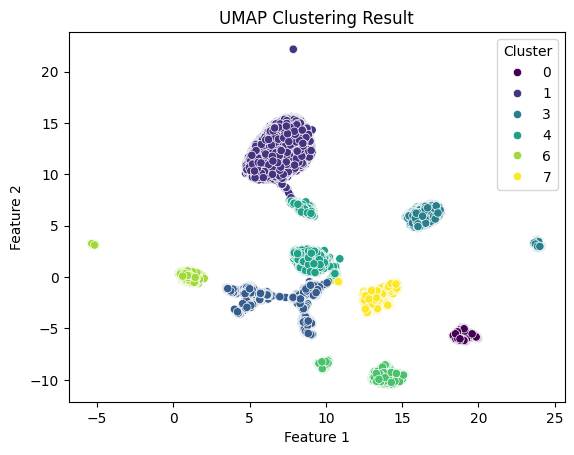

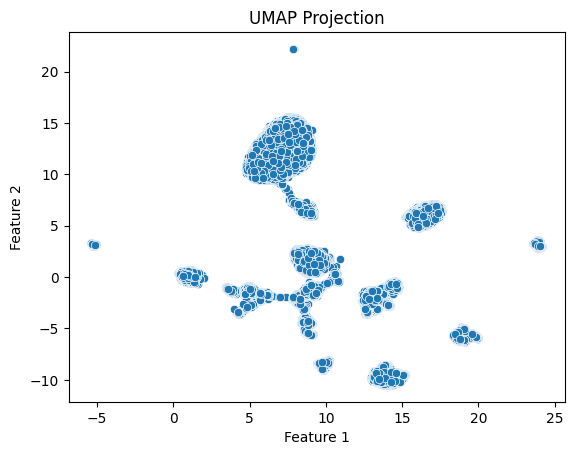

In [ ]:
########## 降維 分群 oversampling ##############

import umap
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SMOTENC, SMOTEN
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.preprocessing import StandardScaler



X_train = base.drop(labels=['Plaque','Severity','FOLLOW'],axis=1).values
y_train = base['Plaque'].values
X_test = follow.drop(labels=['Plaque','Severity','FOLLOW'],axis=1).values
y_test = follow['Plaque'].values
print(len(X_train))

# Combine X_train and X_test, and y_train and y_test
X = np.concatenate([X_train, X_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

import umap

# 使用 UMAP 將數據降維到2維
reducer = umap.UMAP(n_neighbors = 100, n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)
print(X_umap)

# Instantiate and fit KMeans
kmeans = KMeans(n_clusters=8, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(X_umap)

# 創建新的 DataFrame 用於視覺化
df_umap = pd.DataFrame(X_umap, columns=['Feature 1', 'Feature 2'])
df_umap['Cluster'] = kmeans.fit_predict(X_umap)

# 可視化 UMAP 分群結果
sns.scatterplot(data=df_umap, x='Feature 1', y='Feature 2', hue='Cluster', palette='viridis')
plt.title("UMAP Clustering Result")
plt.show()

# Scatter plot without clustering labels
sns.scatterplot(data=df_umap, x='Feature 1', y='Feature 2', marker='o')
plt.title("UMAP Projection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



['SEX', 'AGE', 'DRK', 'HYPERTENSION_SELF', 'GASTROESOPHAGEA_REFLUX_SELF', 'DIABETES_SELF', 'SMK_EXPERIENCE', 'APOPLEXIA_SELF', 'CORONARY_ARTERY_DIS_SELF', 'OTHER_HEART_DIS_SELF', 'HYPERLIPIDEMIA_SELF', 'Severity', 'FOLLOW', 'BMI', 'BODY_FAT_RATE', 'BODY_WAISTLINE', 'SIT_1_SYSTOLIC_PRESSURE', 'SIT_1_DIASTOLIC_PRESSURE', 'SIT_2_SYSTOLIC_PRESSURE', 'SIT_2_DIASTOLIC_PRESSURE', 'SIT_1_HEARTBEAT_SPEED', 'LDL_C', 'TG', 'T_CHO', 'Plaque']
23886
              precision    recall  f1-score   support

           0       0.83      0.56      0.67     14297
           1       0.56      0.82      0.67      9644

    accuracy                           0.67     23941
   macro avg       0.69      0.69      0.67     23941
weighted avg       0.72      0.67      0.67     23941



/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


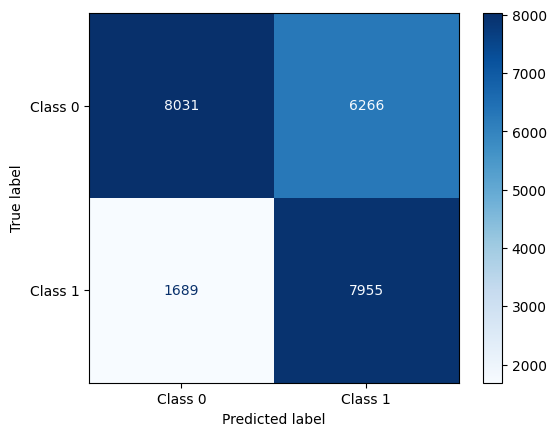

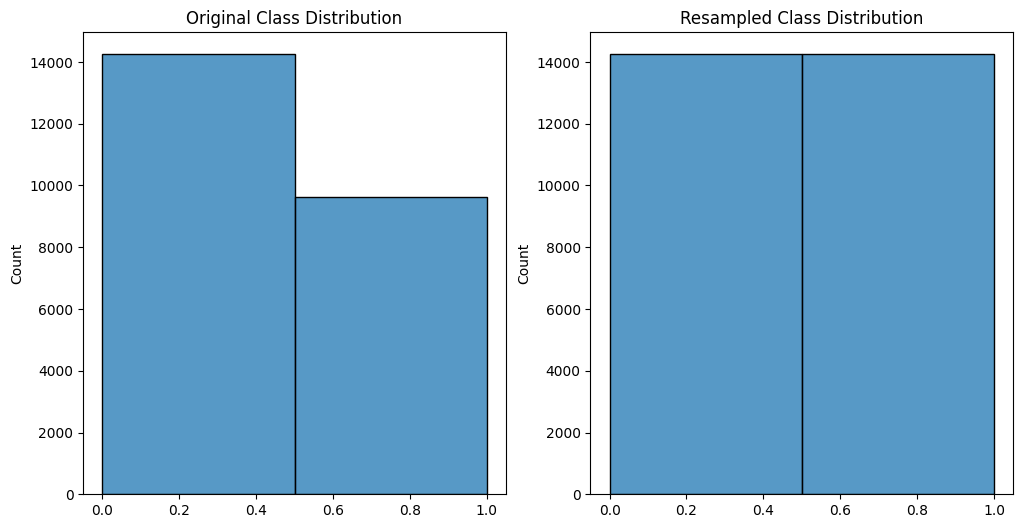

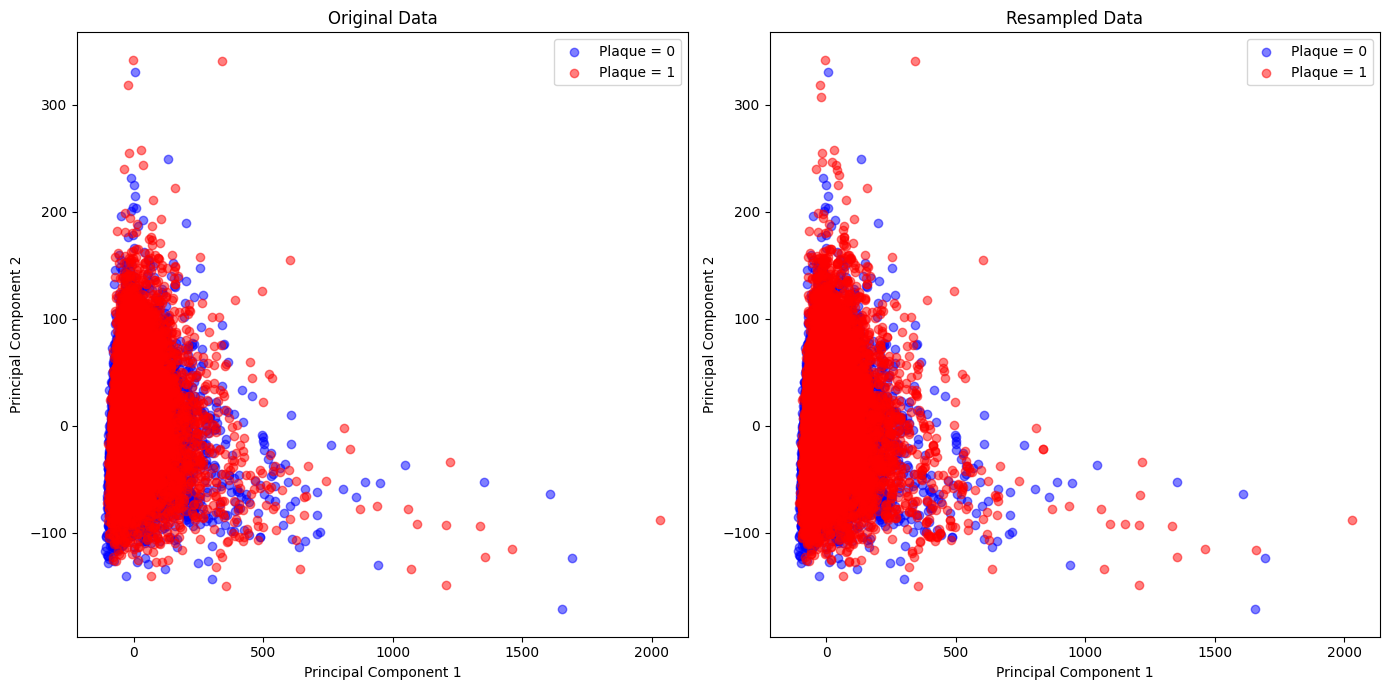

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

feature = base.columns.to_list()
print(feature)
X_train = base.drop(labels=['Plaque','Severity','FOLLOW'],axis=1).values
y_train = base['Plaque'].values
X_test = follow.drop(labels=['Plaque','Severity','FOLLOW'],axis=1).values
y_test = follow['Plaque'].values
print(len(X_train))

# Combine X_train and X_test, and y_train and y_test
X = np.concatenate([X_train, X_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Oversample the PCA-transformed training data
from imblearn.over_sampling import SMOTE,SMOTEN

method = SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)

# Train the Logistic Regression model
clf = LogisticRegression()
clf.fit(X_resampled, y_resampled)

# Make predictions on the PCA-transformed test data
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Plot original class distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y_train, bins=2, kde=False)
plt.title('Original Class Distribution')

# Plot resampled class distribution
plt.subplot(1, 2, 2)
sns.histplot(y_resampled, bins=2, kde=False)
plt.title('Resampled Class Distribution')

plt.show()

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_resampled_pca = pca.transform(X_resampled)
X_test_pca = pca.transform(X_test)

# Separate original data
X_pca_original = X_pca[:len(X_train)]
y_pca_original = y[:len(X_train)]

# Separate resampled data
X_pca_resampled = X_resampled_pca
y_pca_resampled = y_resampled

# Plot original data
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(X_pca_original[y_pca_original == 0, 0], X_pca_original[y_pca_original == 0, 1], color='blue', label='Plaque = 0', alpha=0.5)
plt.scatter(X_pca_original[y_pca_original == 1, 0], X_pca_original[y_pca_original == 1, 1], color='red', label='Plaque = 1', alpha=0.5)
plt.title('Original Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot resampled data
plt.subplot(1, 2, 2)
plt.scatter(X_pca_resampled[y_pca_resampled == 0, 0], X_pca_resampled[y_pca_resampled == 0, 1], color='blue', label='Plaque = 0', alpha=0.5)
plt.scatter(X_pca_resampled[y_pca_resampled == 1, 0], X_pca_resampled[y_pca_resampled == 1, 1], color='red', label='Plaque = 1', alpha=0.5)
plt.title('Resampled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()



Optimization terminated successfully.
         Current function value: 0.536912
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Plaque   No. Observations:                28498
Model:                          Logit   Df Residuals:                    28475
Method:                           MLE   Df Model:                           22
Date:                Mon, 26 Aug 2024   Pseudo R-squ.:                  0.2254
Time:                        06:57:39   Log-Likelihood:                -15301.
converged:                       True   LL-Null:                       -19753.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -7.5354      0.292    -25.775      0.000   

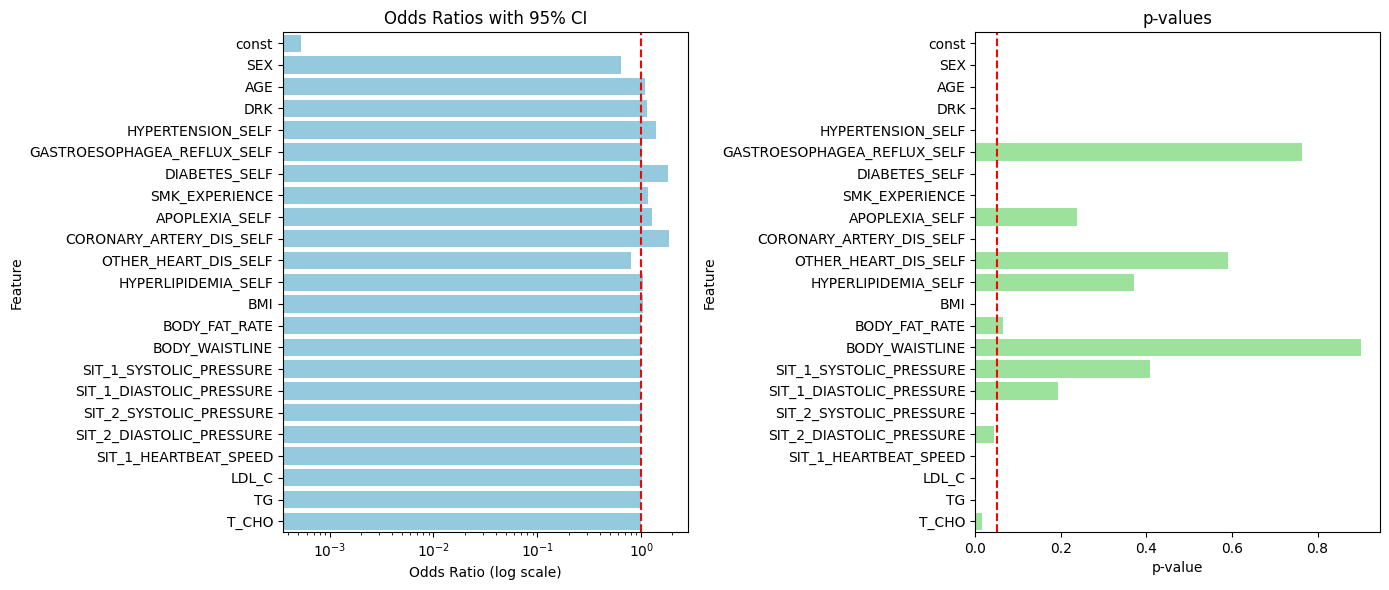

In [ ]:
# Assuming X_resampled is a pandas DataFrame and y_resampled is a pandas Series
X_resampled_df = pd.DataFrame(X_resampled, columns=['SEX', 'AGE', 'DRK', 'HYPERTENSION_SELF',
                                                    'GASTROESOPHAGEA_REFLUX_SELF', 'DIABETES_SELF',
                                                    'SMK_EXPERIENCE', 'APOPLEXIA_SELF',
                                                    'CORONARY_ARTERY_DIS_SELF', 'OTHER_HEART_DIS_SELF',
                                                    'HYPERLIPIDEMIA_SELF',
                                                    'BMI', 'BODY_FAT_RATE', 'BODY_WAISTLINE',
                                                    'SIT_1_SYSTOLIC_PRESSURE', 'SIT_1_DIASTOLIC_PRESSURE',
                                                    'SIT_2_SYSTOLIC_PRESSURE', 'SIT_2_DIASTOLIC_PRESSURE',
                                                    'SIT_1_HEARTBEAT_SPEED', 'LDL_C', 'TG', 'T_CHO'])

y_resampled_series = pd.Series(y_resampled, name='Plaque')

# Fit Logistic Regression Model
logit_model = sm.Logit(y_resampled_series, sm.add_constant(X_resampled_df))
result = logit_model.fit()

# Output the regression results
print(result.summary())

# Calculate odds ratios with feature names
conf = result.conf_int()
conf['OR'] = result.params
conf.columns = ['95% CI Lower', '95% CI Upper', 'OR']
conf = np.exp(conf)
p_values = result.pvalues
# Display odds ratios
odds_ratios = pd.DataFrame({
    'Feature': conf.index,
    'OR': conf['OR'],
    '95% CI Lower': conf['95% CI Lower'],
    '95% CI Upper': conf['95% CI Upper'],'p-value': p_values
}).reset_index(drop=True)

print(odds_ratios)
print(odds_ratios.columns)

# Plotting Odds Ratios and p-values
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Odds Ratios
sns.barplot(x='OR', y='Feature', data=odds_ratios, ax=ax[0], color='skyblue')
ax[0].set_xscale('log')
ax[0].set_title('Odds Ratios with 95% CI')
ax[0].axvline(x=1, color='red', linestyle='--')
ax[0].set_xlabel('Odds Ratio (log scale)')

# Plot p-values
sns.barplot(x='p-value', y='Feature', data=odds_ratios, ax=ax[1], color='lightgreen')
ax[1].set_title('p-values')
ax[1].axvline(x=0.05, color='red', linestyle='--')
ax[1].set_xlabel('p-value')

plt.tight_layout()
plt.show()

In [ ]:
### 中風 追蹤後有變化者 24043:164
### 高血壓 22644:1556
### 高血脂 22353:1854
### 糖尿病 23594:759
### 冠心病 23869:369

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load DataFrames
base = pd.read_csv('base_noimg.csv')
follow = pd.read_csv('follow_noimg.csv')

##########檢查追蹤後那些欄位發生變化##############

# Merge DataFrames on 'PA_UIKey'
merged_df = pd.merge(base[['PA_UIKey', 'CORONARY_ARTERY_DIS_SELF']], follow[['PA_UIKey', 'CORONARY_ARTERY_DIS_SELF']],
                     on='PA_UIKey', suffixes=('_base', '_follow'))
merged_df = merged_df.dropna(subset=['CORONARY_ARTERY_DIS_SELF_follow','CORONARY_ARTERY_DIS_SELF_base'])

print(merged_df)
# Identify changes in severity
merged_df['CORONARY_ARTERY_DIS_SELF_change'] = merged_df['CORONARY_ARTERY_DIS_SELF_base'] != merged_df['CORONARY_ARTERY_DIS_SELF_follow']

print(merged_df[merged_df['CORONARY_ARTERY_DIS_SELF_change'] == False])
print(merged_df[merged_df['CORONARY_ARTERY_DIS_SELF_change'] == True])

Optimization terminated successfully.
         Current function value: 0.535126
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                28498
Model:                          Logit   Df Residuals:                    28475
Method:                           MLE   Df Model:                           22
Date:                Mon, 26 Aug 2024   Pseudo R-squ.:                  0.2280
Time:                        06:43:32   Log-Likelihood:                -15250.
converged:                       True   LL-Null:                       -19753.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.7048      0.294    -26.229      0.000      -8.280      -7.129
x1            -0.4090      0.

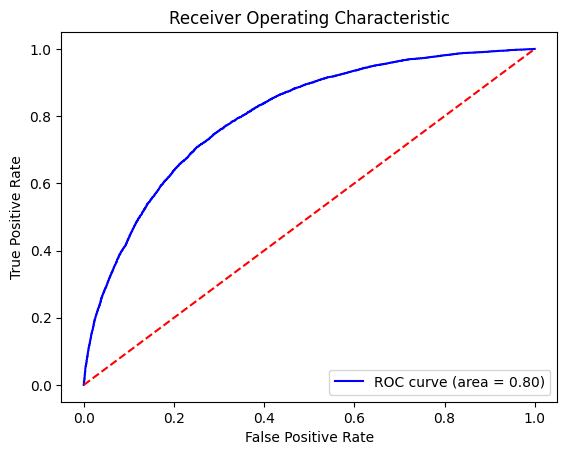

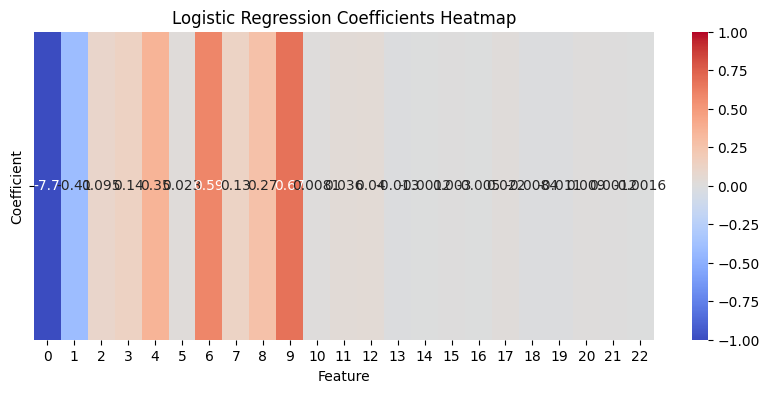

In [ ]:
################## MUTIVARIATE LOGISTIC PLAQUE ###################

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt


# Fit Logistic Regression Model
logit_model = sm.Logit(y_resampled, sm.add_constant(X_resampled))
result = logit_model.fit()

# Output the regression results
print(result.summary())

# Extract parameters and confidence intervals
params = result.params
conf = result.conf_int()  # Get confidence intervals

# Convert params and conf to DataFrames for easier handling
params_df = pd.DataFrame(params, columns=['Coefficient'])
conf_df = pd.DataFrame(conf, columns=['2.5%', '97.5%'])

# Exponentiate the confidence intervals to get the odds ratios
conf_df = np.exp(conf_df)

# Combine params and conf into a DataFrame
odds_ratios = pd.DataFrame({
    'OR': np.exp(params_df['Coefficient']),
    '95% CI Lower': conf_df['2.5%'],
    '95% CI Upper': conf_df['97.5%']
}, index=params_df.index)

odds_ratios.index.name = 'Feature'
odds_ratios.reset_index(inplace=True)
odds_ratios = odds_ratios.round(4)

print(odds_ratios)

# Predict and generate classification report
y_pred = result.predict(sm.add_constant(X_test))
y_pred_class = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_class))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# Extract the coefficients
coefficients = pd.DataFrame(result.params, columns=['Coefficient'])
coefficients.index.name = 'Feature'
coefficients.reset_index(inplace=True)

# Create a heatmap of logistic regression coefficients
plt.figure(figsize=(10, 4))
sns.heatmap(coefficients.set_index('Feature').T, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Logistic Regression Coefficients Heatmap')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt

################################# 中風預測 ###############################
df_ = df.copy()
df_ = df_.dropna(subset=['APOPLEXIA_SELF','HYPERTENSION_SELF','T_CHO','AGE','RICA_DIAMETER','BODY_FAT_RATE','RCCA_PULSE','LCCA_RESISTANCE','RCCA_MAX_AVG_FLOW',
                        'LCCA_DIAMETER','RCCA_DIAMETER','BMI'])
# Prepare features and target variable
X = df_[['HYPERTENSION_SELF','T_CHO','AGE','RICA_DIAMETER','BODY_FAT_RATE','LCCA_RESISTANCE','RCCA_MAX_AVG_FLOW','RCCA_PULSE',
                        'LCCA_DIAMETER','RCCA_DIAMETER', 'BMI']]
y = df_['APOPLEXIA_SELF']

# Normalize the features (Min-Max Scaling)
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Standardize the features (Z-score Standardization)
standardizer = StandardScaler()
X_standardized = standardizer.fit_transform(X_normalized)

# Convert arrays back to DataFrame for consistency
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)
X_standardized_df['APOPLEXIA_SELF'] = y.values  # Ensure y has the same index

# Check for duplicates in the index and reset if necessary
X_standardized_df = X_standardized_df.reset_index(drop=True)

# Perform random undersampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_standardized_df.drop('APOPLEXIA_SELF', axis=1), X_standardized_df['APOPLEXIA_SELF'])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Check the dimensions of X and y
print("Dimensions of X_train:", X_train.shape)
print("Dimensions of X_test:", X_test.shape)
print("Dimensions of y_train:", y_train.shape)
print("Dimensions of y_test:", y_test.shape)

# Fit Logistic Regression Model
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()

# Output the regression results
print(result.summary())

# Predict and generate classification report
y_pred = result.predict(sm.add_constant(X_test))
y_pred_class = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_class))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Compute the correlation matrix for original features
correlation_matrix = X[['HYPERTENSION_SELF','T_CHO','AGE','RICA_DIAMETER','BODY_FAT_RATE','RCCA_PULSE','RCCA_MAX_AVG_FLOW',
                        'LCCA_DIAMETER','LICA_PULSE','RCCA_DIAMETER','BMI']].corr()

# Create a heatmap of feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

# Extract the coefficients
coefficients = pd.DataFrame(result.params, columns=['Coefficient'])
coefficients.index.name = 'Feature'
coefficients.reset_index(inplace=True)

# Create a heatmap of logistic regression coefficients
plt.figure(figsize=(10, 4))
sns.heatmap(coefficients.set_index('Feature').T, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Logistic Regression Coefficients Heatmap')
plt.show()